In [37]:
import numpy as np
import importlib
import utils
import drawing
importlib.reload(utils)
importlib.reload(drawing)

X_train, y_train, is_outlier_train, X_val, y_val, is_outlier_val, X_test, y_test, is_outlier_test = utils.get_data("saved_inputs_targets")

score_dict = {
    "teacher": y_test,
    "cicada_v1": np.load("data/cicada_v1_preds.npy").flatten(),
    "cicada_v2": np.load("data/cicada_v2_preds.npy").flatten(),
}


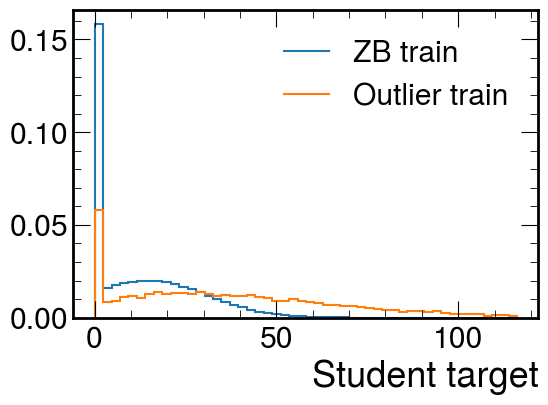

In [39]:
import matplotlib.pyplot as plt
import mplhep as hep

hep.style.use("CMS")

fig, ax = plt.subplots(figsize=(6, 4))
h1 = np.histogram(y_ZB_train, bins=50)
h2 = np.histogram(y_outlier_train, bins=h1[1])
hep.histplot([h1, h2], bins=None, density=True, label=["ZB train", "Outlier train"])
plt.gca().set_xlabel("Student target")
plt.legend()

<Axes: xlabel='Student target', ylabel='a.u.'>

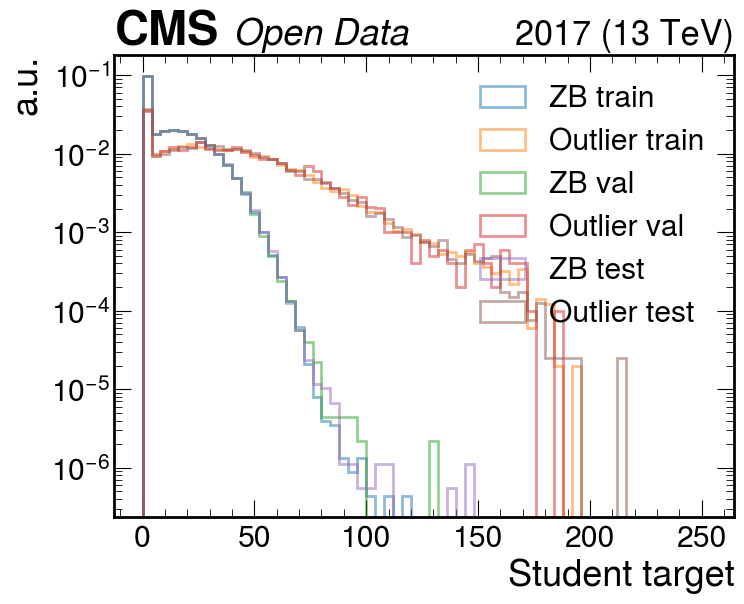

In [40]:
import matplotlib.pyplot as plt
import mplhep as hep

hep.style.use("CMS")

fig, ax = plt.subplots(figsize=(8,6))
bins = np.arange(0, 256, 4)
ax.hist(y_train[is_outlier_train==0], bins=bins, density=True, alpha=0.5, label="ZB train", histtype="step", lw=2)
ax.hist(y_train[is_outlier_train==1], bins=bins, density=True, alpha=0.5, label="Outlier train", histtype="step", lw=2)
ax.hist(y_val[is_outlier_val==0], bins=bins, density=True, alpha=0.5, label="ZB val", histtype="step", lw=2)
ax.hist(y_val[is_outlier_val==1], bins=bins, density=True, alpha=0.5, label="Outlier val", histtype="step", lw=2)
ax.hist(y_test[is_outlier_test==0], bins=bins, density=True, alpha=0.5, label="ZB test", histtype="step", lw=2)
ax.hist(y_test[is_outlier_test==1], bins=bins, density=True, alpha=0.5, label="Outlier test", histtype="step", lw=2)
ax.set_yscale("log")
ax.legend()

ax.set_xlabel("Student target")
ax.set_ylabel("a.u.")

hep.cms.text(" Open Data", loc=0)
hep.cms.lumitext("2017 (13 TeV)")

Left legend keyzs: ['teacher', 'cicada_v2', 'cicada_v1'], Right legend keys: []


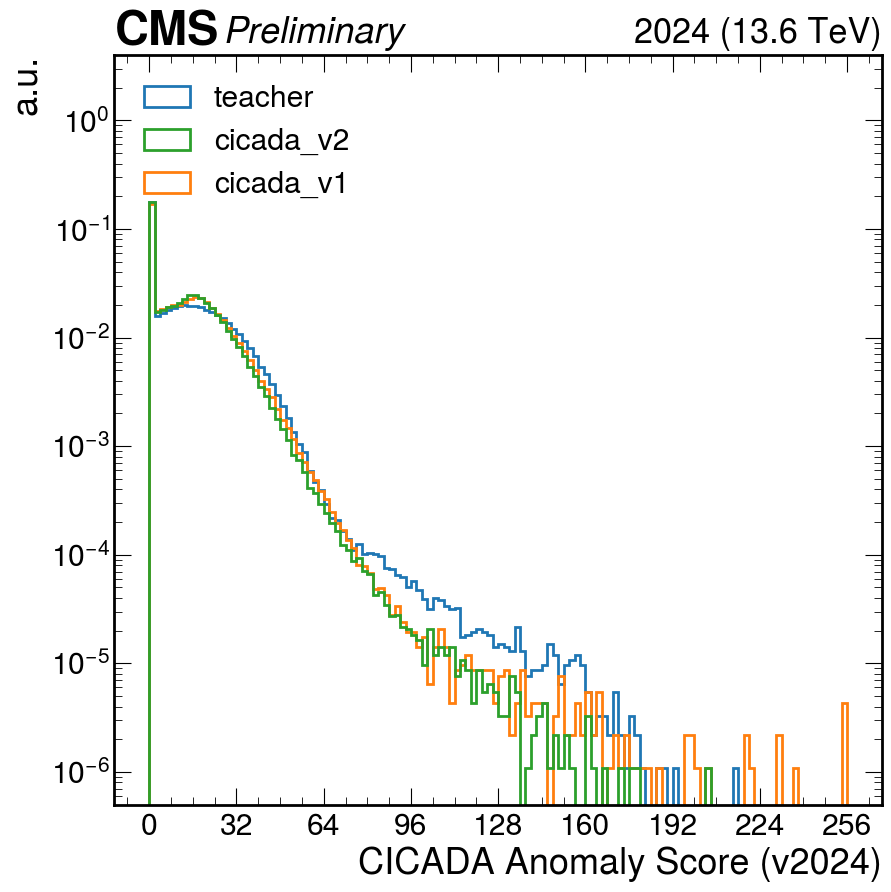

In [42]:
import importlib
import drawing
importlib.reload(drawing)
draw = drawing.Draw(interactive=True)

draw.plot_anomaly_score_distribution(
    score_dict.values(),
    labels=list(score_dict.keys()),
    name="as-dist-cicada",
    xlabel="CICADA Anomaly Score (v2024)",
    bins=range(0, 258, 2),
    xticks=range(0, 258, 32),
    left_legend_col=(0, -1, 1),
)


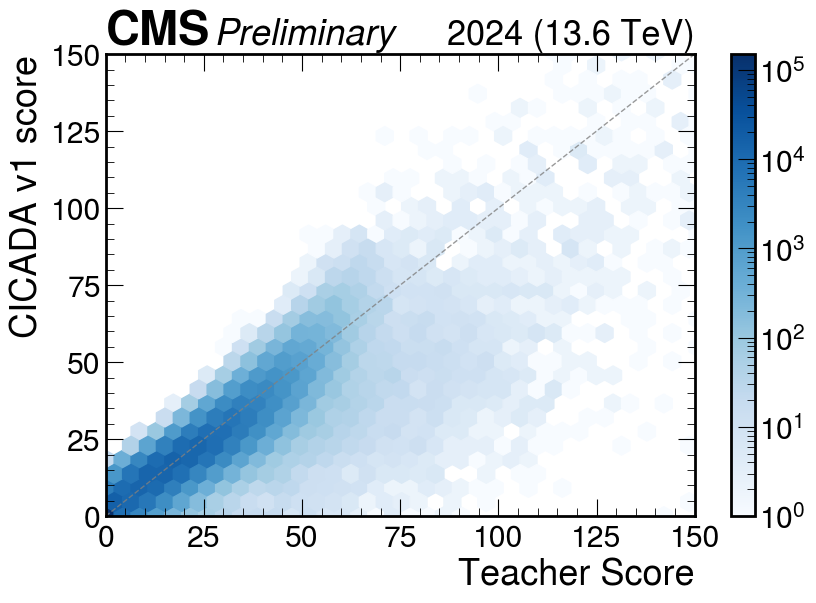

In [43]:
import importlib
import drawing

importlib.reload(drawing)
draw = drawing.Draw(interactive=True, )

draw.make_teacher_student_scatter_plot(
    score_dict["teacher"],
    score_dict["cicada_v1"],
    ylabel="CICADA v1 score",
    name="cicada_vs_teacher_score",
)


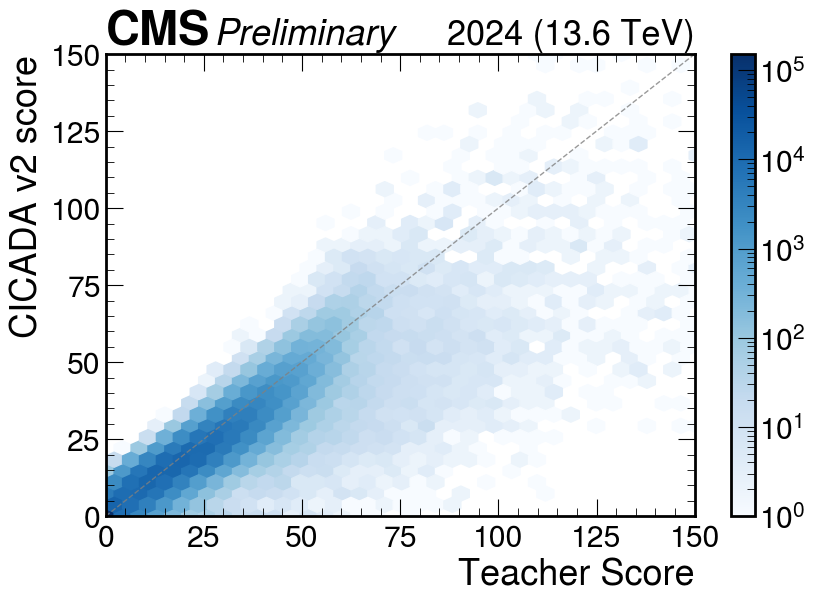

In [45]:
import importlib
import drawing

importlib.reload(drawing)
draw = drawing.Draw(interactive=True, )

draw.make_teacher_student_scatter_plot(
    score_dict["teacher"],
    score_dict["cicada_v2"],
    ylabel="CICADA v2 score",
    name="cicada_vs_teacher_score",
)


In [70]:
import pandas as pd

# read training history
histories = {}
for file_name in ["data/cicada-v1-training.log", "data/cicada-v2-training.log", "data/lgn-training.log"]:
    histories[file_name] = pd.read_csv(file_name)

print(histories["data/lgn-training.log"].head())


   train_loss    val_loss
0  115.481964  114.175659
1  105.894760  107.577644
2   97.713623  101.179832
3   92.891052   94.978584
4   89.890900   87.982964


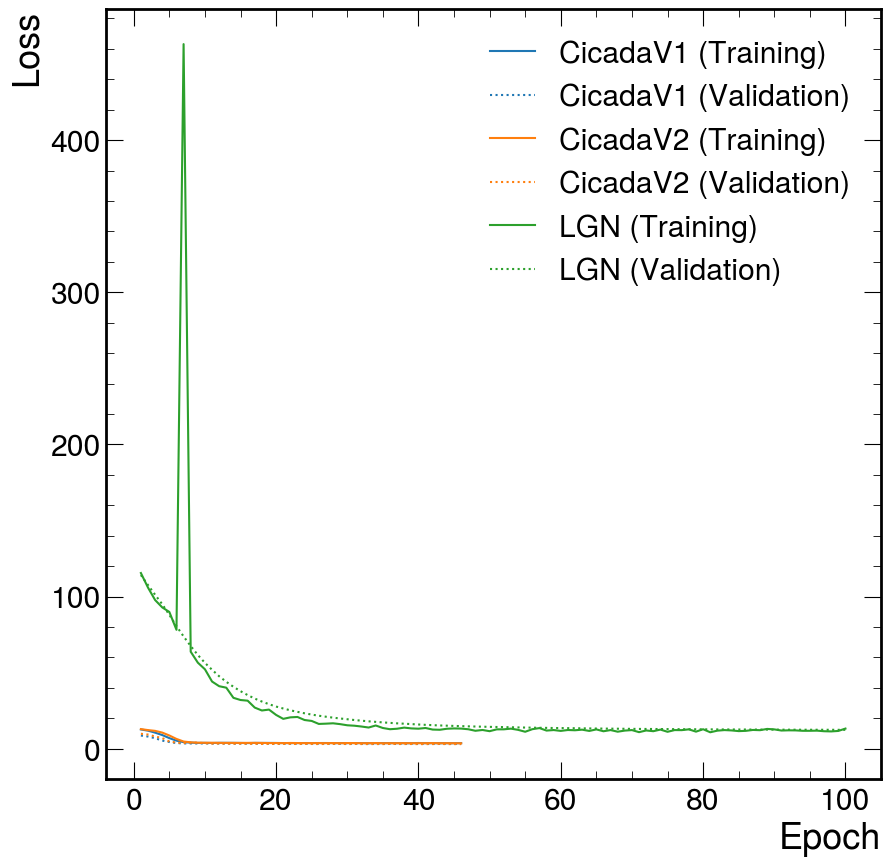

In [ ]:
importlib.reload(drawing)
draw = drawing.Draw(interactive=True, )

d = {
    "CicadaV1": (
        histories["data/cicada-v1-training.log"]["loss"],
        histories["data/cicada-v1-training.log"]["val_loss"]
    ),
    "CicadaV2": (
        histories["data/cicada-v2-training.log"]["loss"],
        histories["data/cicada-v2-training.log"]["val_loss"]
    ),
    "LGN": (
        histories["data/lgn-training.log"]["train_loss"],
        histories["data/lgn-training.log"]["val_loss"]
    )
}

d["LGN"]["train_loss"] = d["LGN"]["train_loss"].clip(lower=0, upper=100)

draw.plot_loss_histories(d, name="cicada-loss-histories")
